## code for filtering the relevant tweets based on the keywords

In [ ]:
import csv
import re

# Define the list of keywords
keywords = [
    "tap in", "tap out", "saldo", "halte", "rute", "jalur", "jadwal", "tarif",
    "macet", "antri", "antrian", "penuh", "operasional", "bersih", "kotor", "nyaman",
    "tidak nyaman", "AC", "panas", "dingin", "adem", "driver", "sopir", "supir", "kursi",
    "naik", "turun", "terlambat", "keterlambatan", "lambat", "telat", "lama", "cepat",
    "cepet", "berangkat", "tiba", "sampai", "sampe", "harga", "murah", "mahal", "perjalanan",
    "padat", "biaya", "sistem", "layanan", "komplain", "penumpang", "keluhan", "masalah",
    "pelayanan", "batal", "informasi", "info", "aplikasi", "error", "track", "tracking",
    "copet", "kehilangan", "pegel", "nunggu", "menunggu", "pendingin udara", "sepi", "ramai",
    "rame", "cape", "capek", "kepotong", "tunggu", "kacau", "aplikasi", "apk", "hilang",
    "jam", "ngebut", "live tracking", "live", "tracking", "kebersihan", "kendala",
    "armada", "rusak", "kartu", "perbaikan", "perbaiki", "gangguan", "eror", "diskon",
    "potongan", "kapasitas", "keberangkatan", "ketepatan", "aman", "tidak aman", "keamanan"
]

# Remove duplicate keywords if any
keywords = list(set(keywords))

# Input and output CSV file paths
input_csv = "your_input_file.csv"   # Change this to the path of your dataset file
output_csv = "filtered_tweets.csv"

def tweet_is_relevant(text, keywords):
    """
    Check if the tweet text contains any of the keywords.
    Comparison is done in a case-insensitive manner.
    """
    text_lower = text.lower()
    for kw in keywords:
        if kw.lower() in text_lower:
            return True
    return False

# Use a set to track unique tweet identifiers using the 'No' field
seen_ids = set()
filtered_rows = []

with open(input_csv, newline='', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames  # Use the original field names
    
    for row in reader:
        tweet_text = row["full_text"]
        # Use the 'No' attribute as the unique identifier
        tweet_id = row["No"]
        
        if tweet_id in seen_ids:
            continue  # Skip duplicate tweets

        if tweet_is_relevant(tweet_text, keywords):
            filtered_rows.append(row)
            seen_ids.add(tweet_id)

# Write the filtered rows to a new CSV file
with open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_rows)

print(f"Filtering complete. {len(filtered_rows)} relevant tweets saved to {output_csv}.")


Filtering complete. 8124 tweets saved to filtered_tweets.csv.


## filtering out tweets that asked question to admin TJ

In [6]:
import csv

# Define the exclusion trigger keywords: if a tweet contains all of these,
# then it is considered irrelevant and filtered out.
exclusion_keywords = ["min", "@pt_transjakarta", "?"]

def tweet_should_exclude(text, exclusion_keywords):
    """
    Returns True if the text contains all of the exclusion keywords:
    - For normal text tokens (e.g., "min", "@pt_transjakarta", "rute"),
      the check is case-insensitive.
    - For the question mark '?', we simply check for its presence.
    """
    text_lower = text.lower()
    
    # Check each keyword: if any keyword is missing, return False.
    for kw in exclusion_keywords:
        if kw == "?":
            if "?" not in text:
                return False
        else:
            if kw.lower() not in text_lower:
                return False
    return True

# Input and output CSV file paths
input_csv = "output_of_filtering v1.0.csv"   # Change this to the path of your dataset file
output_csv = "free_from_question_tweets.csv"

# Use a set to track unique tweet identifiers based on the 'No' field
seen_ids = set()
filtered_rows = []

with open(input_csv, newline='', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames  # Use the original field names
    for row in reader:
        tweet_text = row["full_text"]
        tweet_id = row["No"]  # Use 'No' as unique identifier

        # Skip duplicates
        if tweet_id in seen_ids:
            continue

        # Check the exclusion condition: if the tweet contains all trigger words, skip it.
        if tweet_should_exclude(tweet_text, exclusion_keywords):
            continue

        # Otherwise, keep the tweet
        filtered_rows.append(row)
        seen_ids.add(tweet_id)

# Write the filtered rows to a new CSV file
with open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_rows)

print(f"Filtering complete. {len(filtered_rows)} tweets saved to {output_csv}.")


Filtering complete. 5295 tweets saved to free_from_question_tweets.csv.


## EDA - shows the distribution of words amount

Summary Statistics for Word Count:
count    5088.000000
mean       24.114583
std        13.799073
min         1.000000
25%        13.000000
50%        21.000000
75%        34.000000
max        71.000000
Name: word_count, dtype: float64


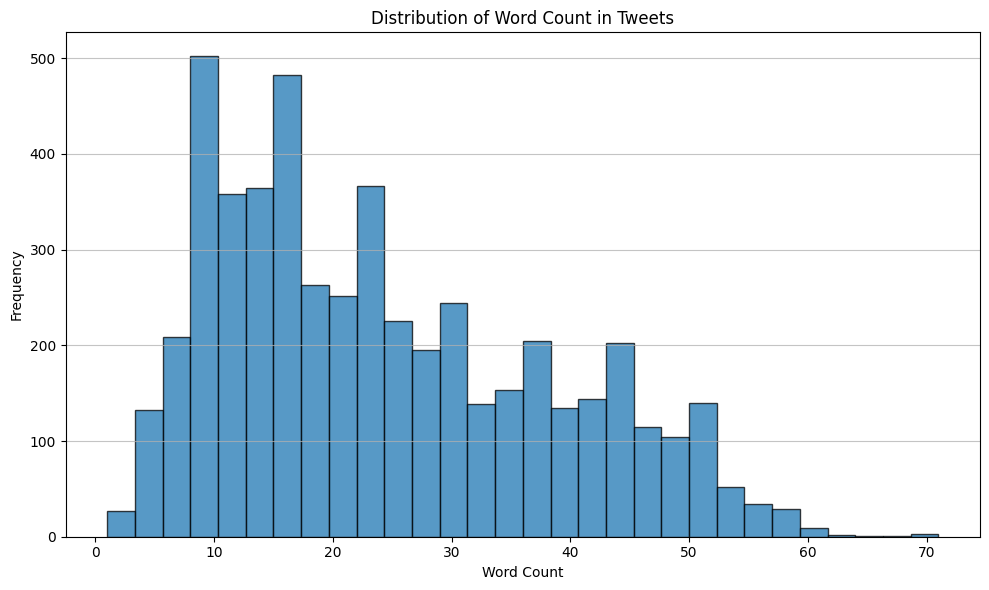

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file. Change the file path if needed.
df = pd.read_csv("free_from_question_tweets_output.csv", encoding='utf-8')

# Create a new column 'word_count' that counts the number of words in each tweet.
# We convert the tweet text to string and split on whitespace.
df['word_count'] = df['cleaned_full_text'].apply(lambda x: len(str(x).split()))

# Display basic statistics about word counts.
print("Summary Statistics for Word Count:")
print(df['word_count'].describe())

# Plot the distribution of word counts.
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, edgecolor='black', alpha=0.75)
plt.title("Distribution of Word Count in Tweets")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


## filtered out tweets that has more than 40 words

In [13]:
import csv

# Input and output CSV file paths
input_csv = "free_from_question_tweets_output.csv"
output_csv = "filtered_tweets_40_words_or_less.csv"

# Maximum number of words allowed
max_word_count = 40

def tweet_word_count(text):
    """Return the number of words in the text."""
    # Ensure we have a string and split on whitespace
    return len(str(text).split())

filtered_rows = []

# Read input CSV and filter rows
with open(input_csv, newline='', encoding='utf-8') as infile:
    reader = csv.DictReader(infile)
    # Save original fieldnames to preserve attributes
    fieldnames = reader.fieldnames

    for row in reader:
        tweet_text = row["cleaned_full_text"]
        # If tweet has max_word_count words or fewer, include it
        if tweet_word_count(tweet_text) <= max_word_count:
            filtered_rows.append(row)

# Write the filtered rows to the output CSV file
with open(output_csv, 'w', newline='', encoding='utf-8') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(filtered_rows)

print(f"Filtering complete. {len(filtered_rows)} tweets (<= {max_word_count} words) saved to {output_csv}.")


Filtering complete. 4252 tweets (<= 40 words) saved to filtered_tweets_40_words_or_less.csv.
